In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [48]:
df=pd.read_csv('training_data.csv',index_col='encounter_id')  #importing files in dataframe

In [49]:
df.head() # look at the head of data

,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
encounter_id,,,,,,,,,,,,,,,,,,,,,
2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,...,No,No,No,No,No,No,No,No,No,N
149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,...,No,Up,No,No,No,No,No,Ch,Yes,N
64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,...,No,No,No,No,No,No,No,No,Yes,N
500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,...,No,Up,No,No,No,No,No,Ch,Yes,N
16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,...,No,Steady,No,No,No,No,No,Ch,Yes,N


In [50]:
df['diag_1'] = pd.to_numeric(df['diag_1'], errors='coerce')
df['diag_2'] = pd.to_numeric(df['diag_1'], errors='coerce')
df['diag_3'] = pd.to_numeric(df['diag_1'], errors='coerce')

In [51]:
# fill in the diag_1, diag_2,diag_3 columns
for age in df['age'].unique():
    for gender in df['gender'].unique():
        average1 = df[(df['gender']==gender)&(df['age']==age)]['diag_1'].mean()
        average2 = df[(df['gender']==gender)&(df['age']==age)]['diag_2'].mean()
        average3 = df[(df['gender']==gender)&(df['age']==age)]['diag_3'].mean()
        df.loc[(df['gender']==gender)&(df['age']==age),'diag_1'] = df.loc[(df['gender']==gender)&(df['age']==age),'diag_1'].fillna(average1)
        df.loc[(df['gender']==gender)&(df['age']==age),'diag_2'] = df.loc[(df['gender']==gender)&(df['age']==age),'diag_2'].fillna(average2)
        df.loc[(df['gender']==gender)&(df['age']==age),'diag_3'] = df.loc[(df['gender']==gender)&(df['age']==age),'diag_3'].fillna(average3)

In [52]:
droplist_1=['weight','patient_nbr','admission_type_id','discharge_disposition_id',
           'admission_source_id','payer_code','medical_specialty','change']

In [53]:
df_obj = df.select_dtypes(include=['object'])

In [54]:
# list of columns that can be dropped because this particular medication is not
# given to enough patient to make any difference in this analysis
drop_list=[]
for col in df_obj.columns:
    if df_obj[str(col)].value_counts()[0]>(len(df_obj.index)-1000):
        drop_list.append(str(col))
print(drop_list)

['nateglinide', 'chlorpropamide', 'acetohexamide', 'tolbutamide', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone']


In [55]:
for j in droplist_1:
    drop_list.append(j)

In [56]:
df1 = df.drop(drop_list,axis=1)

In [57]:
df1.head(2)

,race,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,...,metformin,repaglinide,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,insulin,diabetesMed,readmitted
encounter_id,,,,,,,,,,,,,,,,,,,,,
2278392,Caucasian,Female,[0-10),1,41,0,1,0,0,0,...,No,No,No,No,No,No,No,No,No,N
149190,Caucasian,Female,[10-20),3,59,0,18,0,0,0,...,No,No,No,No,No,No,No,Up,Yes,N


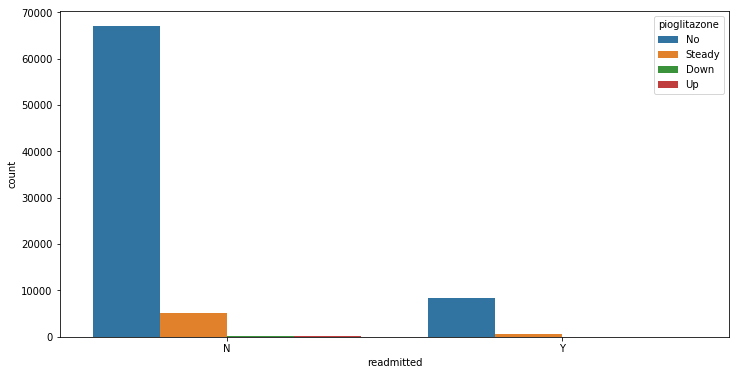

In [58]:
plt.figure(figsize=(12,6))
sns.countplot(df['readmitted'],hue=df['pioglitazone'])

In [59]:
df[df['readmitted']=='Y']['pioglitazone'].value_counts()/df[df['readmitted']=='Y']['pioglitazone'].value_counts().sum()

No        0.931653
Steady    0.063945
Up        0.002641
Down      0.001761
Name: pioglitazone, dtype: float64

In [60]:
df1_obj = df1.select_dtypes(include=['object'])

In [61]:
df1_obj.columns

Index(['race', 'gender', 'age', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'glimepiride', 'glipizide', 'glyburide', 'pioglitazone',
       'rosiglitazone', 'insulin', 'diabetesMed', 'readmitted'],
      dtype='object')

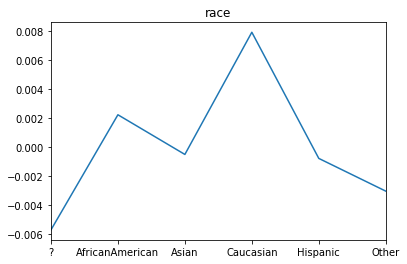

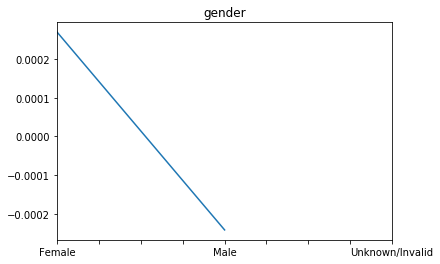

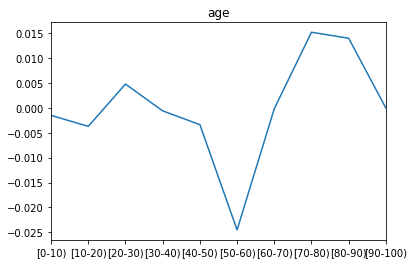

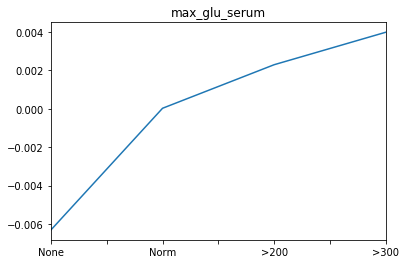

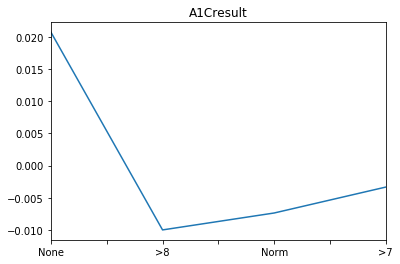

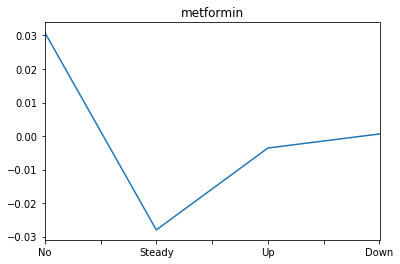

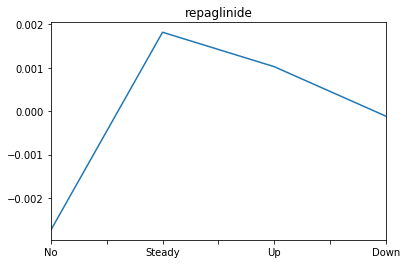

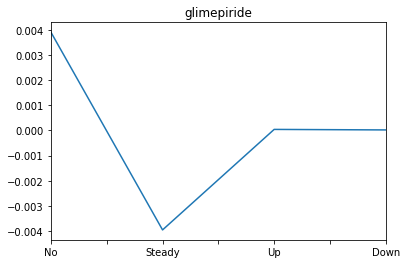

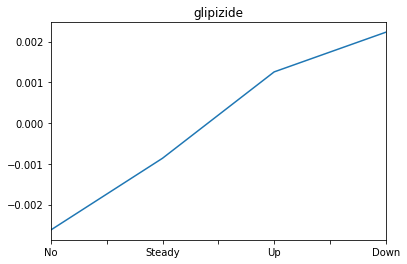

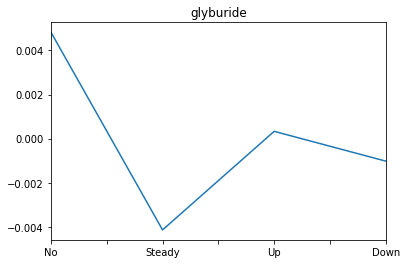

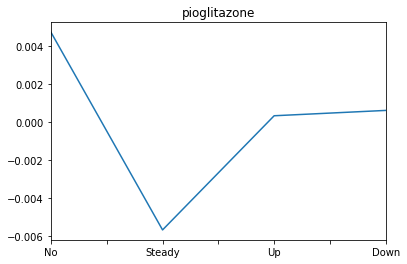

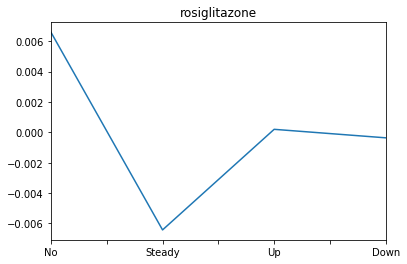

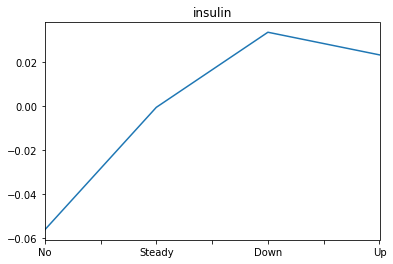

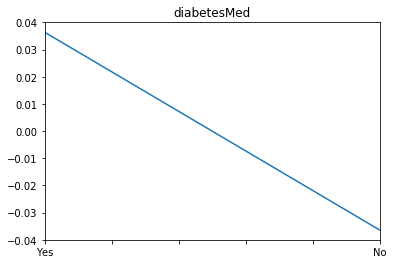

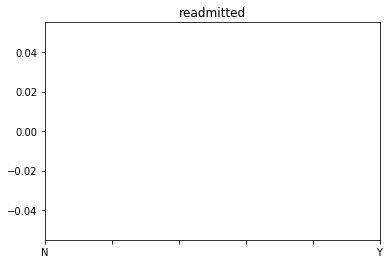

In [62]:
for col in df1_obj.columns:
    readm_y = df[df['readmitted']=='Y'][str(col)].value_counts()/df[df['readmitted']=='Y'][str(col)].value_counts().sum()
    readm_n = df[df['readmitted']=='N'][str(col)].value_counts()/df[df['readmitted']=='N'][str(col)].value_counts().sum()
    (readm_y-readm_n).plot()
    plt.title(str(col))
    plt.show()
    

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81414 entries, 2278392 to 443867222
Data columns (total 49 columns):
patient_nbr                 81414 non-null int64
race                        81414 non-null object
gender                      81414 non-null object
age                         81414 non-null object
weight                      81414 non-null object
admission_type_id           81414 non-null int64
discharge_disposition_id    81414 non-null int64
admission_source_id         81414 non-null int64
time_in_hospital            81414 non-null int64
payer_code                  81414 non-null object
medical_specialty           81414 non-null object
num_lab_procedures          81414 non-null int64
num_procedures              81414 non-null int64
num_medications             81414 non-null int64
number_outpatient           81414 non-null int64
number_emergency            81414 non-null int64
number_inpatient            81414 non-null int64
diag_1                      81414 non-null

In [110]:
df_new = df[['diag_1','diag_2','diag_3','A1Cresult','metformin','insulin',
            'diabetesMed','age','readmitted']]

In [111]:
df_new.head()

,diag_1,diag_2,diag_3,A1Cresult,metformin,insulin,diabetesMed,age,readmitted
encounter_id,,,,,,,,,
2278392,250.83,250.83,250.83,None,No,No,No,[0-10),N
149190,276.00,276.00,276.00,None,No,Up,Yes,[10-20),N
64410,648.00,648.00,648.00,None,No,No,Yes,[20-30),N
500364,8.00,8.00,8.00,None,No,Up,Yes,[30-40),N
16680,197.00,197.00,197.00,None,No,Steady,Yes,[40-50),N


In [112]:
df_new_num = df_new.select_dtypes(include=['int64','float64'])

In [113]:
df_new_num_norm = (df_new_num - df_new_num.mean()) / (df_new_num.max() - df_new_num.min()) #Normalization

In [114]:
df_new_obj = df_new.select_dtypes(include=['object'])

In [115]:
df_new_obj_dummies=pd.get_dummies(df_new_obj,drop_first=True)

In [116]:
new_df1=pd.concat([df_new_num_norm,df_new_obj_dummies],axis=1)

In [117]:
new_df1.head()

,diag_1,diag_2,diag_3,A1Cresult_>8,A1Cresult_None,A1Cresult_Norm,metformin_No,metformin_Steady,metformin_Up,insulin_No,...,age_[10-20),age_[20-30),age_[30-40),age_[40-50),age_[50-60),age_[60-70),age_[70-80),age_[80-90),age_[90-100),readmitted_Y
encounter_id,,,,,,,,,,,,,,,,,,,,,
2278392,-0.243822,-0.243822,-0.243822,0,1,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
149190,-0.218551,-0.218551,-0.218551,0,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
64410,0.154943,0.154943,0.154943,0,1,0,1,0,0,1,...,0,1,0,0,0,0,0,0,0,0
500364,-0.487628,-0.487628,-0.487628,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
16680,-0.297869,-0.297869,-0.297869,0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [119]:
X1=new_df1[new_df1['readmitted_Y']==0].drop('readmitted_Y', axis=1) #because this is our target class
y1=new_df1[new_df1['readmitted_Y']==0]['readmitted_Y']
X2=new_df1[new_df1['readmitted_Y']==1].drop('readmitted_Y', axis=1) #because this is our target class
y2=new_df1[new_df1['readmitted_Y']==1]['readmitted_Y']

In [120]:
from sklearn.cross_validation import train_test_split

In [121]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3)

In [122]:
X_train = pd.concat([X1_train,X2_train])
y_train = pd.concat([y1_train,y2_train])
X_test = pd.concat([X1_test,X2_test])
y_test = pd.concat([y1_test,y2_test])

In [123]:
from sklearn.linear_model import LogisticRegression

In [124]:
logmodel = LogisticRegression(C=0.1)
logmodel.fit(X_train, y_train)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [125]:
predictions = logmodel.predict(X_test)

In [126]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[21699     0]
 [ 2726     0]]
             precision    recall  f1-score   support

          0       0.89      1.00      0.94     21699
          1       0.00      0.00      0.00      2726

avg / total       0.79      0.89      0.84     24425



/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
